In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('Telco-Customer-Churn.xlsx')

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df=pd.DataFrame(data)

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Compare churn count with respect to gender

In [6]:
data.gender.groupby(data['Churn']).value_counts()

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender vs Churn')

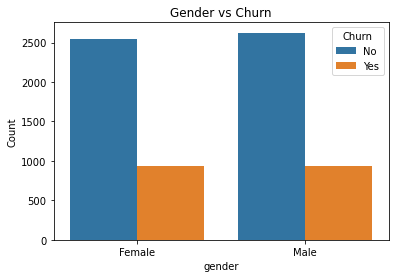

In [7]:
counts = (df.groupby (['gender']) ['Churn'].value_counts ().rename ('Count').reset_index ())
sns.barplot (x="gender", y="Count", hue="Churn", data=counts).set_title ('Gender vs Churn')

# Female senior citizens there in the dataset

In [8]:
n=df.loc[(df['gender']=='Female') & (df['SeniorCitizen']==1),['gender','SeniorCitizen']]
df_new=pd.DataFrame(n)
df_new

,gender,SeniorCitizen
30,Female,1.0
50,Female,1.0
52,Female,1.0
53,Female,1.0
54,Female,1.0
...,...,...
6993,Female,1.0
7008,Female,1.0
7010,Female,1.0
7023,Female,1.0


In [9]:
print(len(df_new))

568


In [ ]:
#There are 568 female senior citizens in this dataset

In [15]:
new=df.loc[(df['gender']=='Female'),['gender','SeniorCitizen']]

Text(0.5, 1.0, 'Female Senior Citizens')

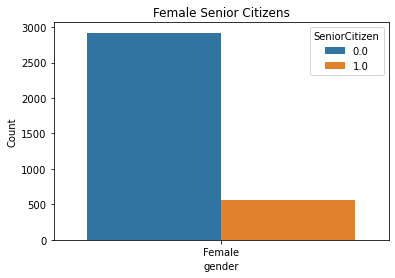

In [17]:
counts = (new.groupby (['gender']) ['SeniorCitizen'].value_counts ().rename ('Count').reset_index ())
sns.barplot (x="gender", y="Count", hue="SeniorCitizen", data=counts).set_title ('Female Senior Citizens')

# Compare 'tenure' with 'Total Charges'

In [12]:
df['tenure'].equals(df['TotalCharges'])


False

In [34]:
df.tenure.groupby(df['TotalCharges']).value_counts()

TotalCharges  tenure
18.80         1.0       1
18.85         1.0       2
18.90         1.0       1
19.00         1.0       1
19.05         1.0       1
                       ..
8564.75       71.0      1
8594.40       72.0      1
8670.10       72.0      1
8672.45       72.0      1
8684.80       72.0      1
Name: tenure, Length: 6762, dtype: int64

Text(0, 0.5, 'Total charges')

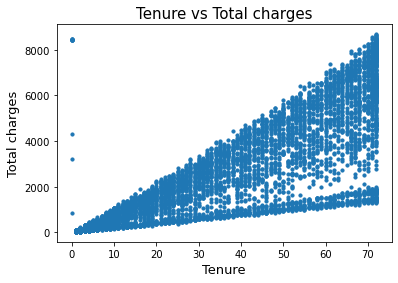

In [84]:
plt.scatter(df['tenure'],df['TotalCharges'],s=10)
plt.title("Tenure vs Total charges",fontsize=15)
plt.xlabel("Tenure",fontsize=13)
plt.ylabel("Total charges",fontsize=13)

# Which contract is preferred by the senior citizen

In [65]:
new=df.loc[(df['SeniorCitizen']==1.0),['SeniorCitizen','Contract']]
new
df['Contract'].mode()

0    Month-to-month
Name: Contract, dtype: object

In [91]:
df['Contract'].value_counts().idxmax()

'Month-to-month'

# MONTH TO MONTH is preferred by Senior Citizen

<AxesSubplot:xlabel='Contract', ylabel='SeniorCitizen'>

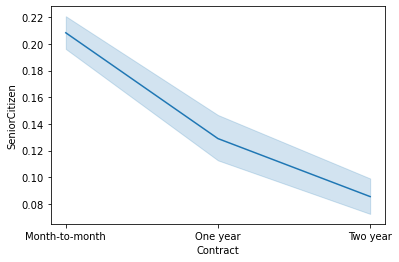

In [63]:
sns.lineplot(x="Contract", y="SeniorCitizen", data=data)

# Comment on your finds on Payment Method

In [68]:
#Most used payment method

df['PaymentMethod'].value_counts().idxmax()

'Electronic check'

Text(0.5, 1.0, 'Count of Payment Method')

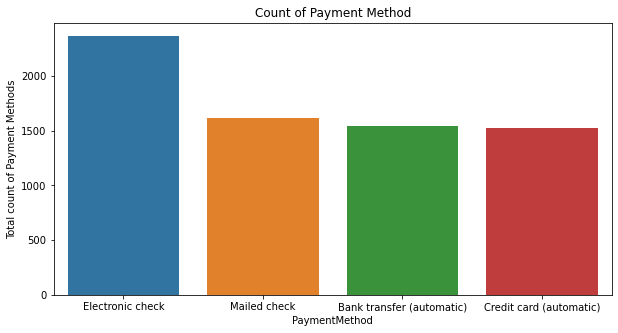

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", data=df)
plt.ylabel('Total count of Payment Methods')
plt.title("Count of Payment Method")

In [70]:
new=df.loc[(df['SeniorCitizen']==1.0),['SeniorCitizen','PaymentMethod']]

In [71]:
new['PaymentMethod'].value_counts().idxmax()

'Electronic check'

In [88]:
# most used payment method by Females
new=df.loc[(df['gender']=='Female'),['gender','PaymentMethod']]
new['PaymentMethod'].value_counts().idxmax()

'Electronic check'

In [89]:
# most used payment by Males

new1=df.loc[(df['gender']=='Male'),['gender','PaymentMethod']]
new['PaymentMethod'].value_counts().idxmax()

'Electronic check'

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

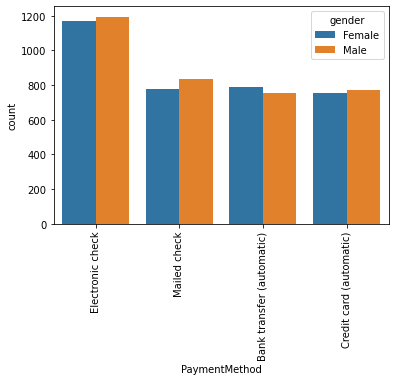

In [92]:
sns.countplot(x ='PaymentMethod', hue='gender', data=data)
plt.xticks(rotation=90)

# Hence,we can conclude that most used payment method by men and female seperately and combined is ELECTRONIC CHECK